In [62]:
#pip install pandas-profiling

In [63]:
import sklearn
sklearn. __version__ 

'0.22.1'

In [64]:
import numpy as np

from pandas_profiling import ProfileReport

In [65]:
import pickle
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)


In [66]:
# df_review = pd.read_pickle('reviews_all.pkl')
# df_review

# Dataframe

In [67]:
df_main = pd.read_pickle('df_main.pkl')
df_main

,prod_name,rating,rating_count,desc,profile,vitolas,Binder,Filler,Flavored,Has Tip,Origin,Pressed,Shapes,Sweet,Wrapper,Brand:
0,1876 Reserve,4.3,513,Even gramps would be proud.On a trip to factor...,Mellow,"[Churchill, Robusto, Toro, Torpedo]",Sumatra,Dominican,False,No,Dominican Republic,No,"Churchill, Robusto, Toro, Torpedo",No,Connecticut,NaN
1,1876 Reserve Maduro,4.19,247,A dark horse from 1876 Reserve.Maestro....drum...,Mellow-Medium,"[Churchill, Robusto, Toro, Torpedo]",NaN,Dominican,False,No,Dominican Republic,No,"Churchill, Robusto, Toro, Torpedo",No,Maduro,NaN
2,3x3 Tubos by Davidoff,4.44,16,3x3 = an Unbridled Winner! There’s tons of cig...,Mellow-Medium,"[Churchill, Corona, Robusto]",Dominican,Dominican,False,No,Dominican Republic,No,"Churchill, Corona, Robusto",No,Connecticut,Davidoff
3,5 Vegas Big Five,4.22,64,High five! 5 Vegas's first new release in year...,Full,"[Churchill, Gordo, Torpedo]",Nicaraguan,Nicaraguan,False,No,Nicaragua,No,"Churchill, Gordo, Torpedo",Varies,"Habano, Nicaraguan",5 Vegas
4,5 Vegas Cask-Strength,4.5,101,A luxurious encore presentation.The term ’cask...,Medium-Full,"[Gordo, Toro]",Nicaraguan,"Honduran, Nicaraguan",False,No,Nicaragua,Yes,"Gordo, Toro",No,Corojo,5 Vegas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,White Owl Cigars,4,15,White Owl cigars are something to hoot about!W...,Mellow,"[Corona, Lancero/Panatela]",NaN,NaN,False,No,United States,No,"Corona, Lancero/Panatela",Yes,HTL,NaN
1612,Wilde Cigars,4.24,59,Wild thing! You make my heart sing!Excuse my l...,Mellow,[Lancero/Panatela],NaN,Dominican,False,No,Dominican Republic,No,Lancero/Panatela,No,Connecticut,NaN
1613,Wynwood Hills,4.5,2,"Back again, and completely “Unhinged” Original...",Medium-Full,[Rothschild],NaN,NaN,False,No,Honduras,No,Rothschild,No,"Connecticut Broadleaf, Corojo, Sumatra",NaN
1614,Zino Platinum Crown Series,5,2,"Strong, powerful, flavorful....Crown Series hi...",Medium-Full,"[Churchill, Gordo, Toro]",Connecticut,"Dominican, Peruvian",False,No,Dominican Republic,No,"Churchill, Gordo, Toro",No,Ecuador Connecticut,NaN


In [68]:
from sklearn.preprocessing import MultiLabelBinarizer
 

s = df_main['vitolas']

mlb = MultiLabelBinarizer()

df_vitola = pd.DataFrame(mlb.fit_transform(s),columns= (f'vitola_' + mlb.classes_), index=df_main.index)

In [69]:
df_main_vitola = pd.concat([df_main, df_vitola], axis=1)

In [70]:
df_KNN = df_main_vitola.copy()

In [71]:
df_KNN1 = df_KNN.drop(['vitolas', 'Shapes','prod_name', 'rating', 'rating_count', 'desc'], axis=1)

In [72]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder

In [73]:
df_KNN1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 46 columns):
profile                    1570 non-null object
Binder                     1046 non-null object
Filler                     1461 non-null object
Flavored                   1616 non-null object
Has Tip                    1538 non-null object
Origin                     1598 non-null object
Pressed                    1615 non-null object
Sweet                      1616 non-null object
Wrapper                    1605 non-null object
Brand:                     1112 non-null object
vitola_Belicoso            1616 non-null int64
vitola_Churchill           1616 non-null int64
vitola_Cigarillos          1616 non-null int64
vitola_Corona              1616 non-null int64
vitola_Corona Especial     1616 non-null int64
vitola_Corona Extra        1616 non-null int64
vitola_Corona Gigante      1616 non-null int64
vitola_Corona Gordo        1616 non-null int64
vitola_Corona Grande       1616 non-n

In [74]:
encoder = OrdinalEncoder()
imputer = IterativeImputer(ExtraTreesRegressor())
inv_tran = []
# create a list of categorical columns to iterate over
cat_cols = ['profile','Binder','Filler','Flavored','Has Tip','Origin','Pressed','Sweet','Wrapper', 'Brand:']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Encoder Dict
    inverse_trans = inv_tran.append(encoder.categories_)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(df_KNN1[columns])

/Users/srn/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/srn/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/srn/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

In [123]:
cat_cols = ['profile','Binder','Filler','Flavored','Has Tip','Origin','Pressed','Sweet','Wrapper', 'Brand:']

categorical_columns = cat_cols
for i,column in enumerate(categorical_columns):
    label_list = inv_tran[i][0]
    df[column] = [label_list[j] for j in df[column]]
    print(column)

profile
Binder
Filler
Flavored
Has Tip
Origin
Pressed
Sweet
Wrapper
Brand:


/Users/srn/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
df

,profile,Binder,Filler,Flavored,Has Tip,Origin,Pressed,Sweet,Wrapper,Brand:
0,Mellow,Sumatra,Dominican,False,No,Dominican Republic,No,No,Connecticut,Camacho
1,Mellow-Medium,"Dominican, Habano",Dominican,False,No,Dominican Republic,No,No,Maduro,Gispert
2,Mellow-Medium,Dominican,Dominican,False,No,Dominican Republic,No,No,Connecticut,Davidoff
3,Full,Nicaraguan,Nicaraguan,False,No,Nicaragua,No,Varies,"Habano, Nicaraguan",5 Vegas
4,Medium-Full,Nicaraguan,"Honduran, Nicaraguan",False,No,Nicaragua,Yes,No,Corojo,5 Vegas
...,...,...,...,...,...,...,...,...,...,...
1611,Mellow,"Dominican, Habano","Dominican, Mexican",False,No,United States,No,Yes,HTL,Macanudo Cigars
1612,Mellow,"Dominican, Nicaraguan",Dominican,False,No,Dominican Republic,No,No,Connecticut,Graycliff
1613,Medium-Full,"Honduran, Mexican","Honduran, Nicaraguan, Panamanian",False,No,Honduras,No,No,"Connecticut Broadleaf, Corojo, Sumatra",Ramon Bueso
1614,Medium-Full,Connecticut,"Dominican, Peruvian",False,No,Dominican Republic,No,No,Ecuador Connecticut,JM Tobacco


In [96]:
# impute data and convert 
encode_data = pd.DataFrame(np.round(imputer.fit_transform(df_KNN1)),columns = df_KNN1.columns)

/Users/srn/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


# Encode Data

In [108]:
# impute data and convert 
encode_data[list(cat_cols)] = encode_data[list(cat_cols)].astype(int)


#encode_data.dtypes
df = encode_data[cat_cols]

In [109]:
df

,profile,Binder,Filler,Flavored,Has Tip,Origin,Pressed,Sweet,Wrapper,Brand:
0,3,65,47,0,1,2,1,1,29,19
1,4,38,47,0,1,2,1,1,161,39
2,4,36,47,0,1,2,1,1,29,26
3,0,59,100,0,1,13,1,3,141,0
4,2,59,81,0,1,13,4,1,71,0
...,...,...,...,...,...,...,...,...,...,...
1611,3,38,64,0,1,17,1,4,123,58
1612,3,39,47,0,1,2,1,1,29,41
1613,2,51,82,0,1,7,1,1,31,73
1614,2,6,72,0,1,2,1,1,92,48


In [55]:
df9 = pd.DataFrame(encoder.categories_)
df9

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88
0,5 Vegas,601 Cigars,AJ Fernandez,AVO,Aging Room Cigars,Alec Bradley,Archetype Cigars,Arganese,Arturo Fuente,Ashton,Asylum,Ave Maria,Baccarat,Bahia,Bugatti Cigars,CAO,CI Knock-Offs,CI Legends,CLE,Camacho,Casa Fernandez,Cohiba,Crowned Heads,Cuba Libre,Cult,Daniel Marshall,Davidoff,Diesel,Djarum Filtered Cigars,Don Pepin Garcia,Don Rafael,Drew Estate Cigars,Dunbarton Tobacco & Trust,Dunhill,E.P. Carrillo,Espinosa,Exactus Cigars,Fonseca,Foundation Cigar Company,Gispert,Gran Habano,Graycliff,Gurkha,Gurkha Black Ops Cigars,H. Upmann,HC Series,Hammer & Sickle Cigars,Illusione,JM Tobacco,Joya de Nicaragua,Kristoff,L'Atelier,La Aroma de Cuba,La Aurora,La Gloria Cubana,La Palina,La Perla Habana,Lucious Lyon,Macanudo Cigars,Man O' War,Montecristo,My Father,Nat Sherman,Nub,Oliva,Padilla,Padron Cigars,Panama Jack,Partagas,Perdomo,Pinar del Rio,Punch Cigars,Quesada Cigars,Ramon Bueso,Rocky Patel Cigars,Romeo y Julieta Cigars,Room101,Royal Agio Cigars,San Cristobal,San Lotano,Sancho Panza,Southern Draw,Swag,Swisher Sweets,Tatuaje Cigars,Torano,Victor Sinclair,Villiger,Warped


In [28]:
encode_data.isnull().sum()

profile                    0
Binder                     0
Filler                     0
Flavored                   0
Has Tip                    0
Origin                     0
Pressed                    0
Sweet                      0
Wrapper                    0
Brand:                     0
vitola_Belicoso            0
vitola_Churchill           0
vitola_Cigarillos          0
vitola_Corona              0
vitola_Corona Especial     0
vitola_Corona Extra        0
vitola_Corona Gigante      0
vitola_Corona Gordo        0
vitola_Corona Grande       0
vitola_Culebra             0
vitola_Double Corona       0
vitola_Double Perfecto     0
vitola_Double Robusto      0
vitola_Double Toro         0
vitola_Figurado            0
vitola_Gigante             0
vitola_Gordo               0
vitola_Gordo Extra         0
vitola_Gran Rothschild     0
vitola_Lancero             0
vitola_Lancero/Panatela    0
vitola_Lancero/Pantella    0
vitola_Lonsdale            0
vitola_Panatela            0
vitola_Perfect

In [11]:
df_main.isnull().sum()


prod_name         0
rating            8
rating_count    222
desc              0
profile          46
vitolas           0
Binder          570
Filler          155
Flavored          0
Has Tip          78
Origin           18
Pressed           1
Shapes            9
Sweet             0
Wrapper          11
Brand:          504
dtype: int64

In [12]:
df_main['rating'].fillna( 0, inplace=True)

In [13]:
df_main['rating_count'].fillna( 0, inplace=True)

In [14]:
df_main['Has Tip'].fillna( 'No', inplace=True)

# Is Null

In [15]:
df_main.isnull().sum()

prod_name         0
rating            0
rating_count      0
desc              0
profile          46
vitolas           0
Binder          570
Filler          155
Flavored          0
Has Tip           0
Origin           18
Pressed           1
Shapes            9
Sweet             0
Wrapper          11
Brand:          504
dtype: int64

In [16]:
import numpy as np

In [17]:
df_nobrand = df_main.drop('Brand:',1)

In [18]:
df_nobrand['is_null'] = df_nobrand.isna().sum(axis=1).apply(lambda x: 0 if x==0 else 1)

In [19]:
df_nobrand['is_null'].sum()

624

In [20]:
df_main['is_null'] = df_main.isna().sum(axis=1).apply(lambda x: 0 if x==0 else 1)

In [21]:
df_main['is_null'].sum()

921

In [22]:
df_main

,prod_name,rating,rating_count,desc,profile,vitolas,Binder,Filler,Flavored,Has Tip,Origin,Pressed,Shapes,Sweet,Wrapper,Brand:,is_null
0,1876 Reserve,4.3,513,Even gramps would be proud.On a trip to factor...,Mellow,"[Churchill, Robusto, Toro, Torpedo]",Sumatra,Dominican,False,No,Dominican Republic,No,"Churchill, Robusto, Toro, Torpedo",No,Connecticut,NaN,1
1,1876 Reserve Maduro,4.19,247,A dark horse from 1876 Reserve.Maestro....drum...,Mellow-Medium,"[Churchill, Robusto, Toro, Torpedo]",NaN,Dominican,False,No,Dominican Republic,No,"Churchill, Robusto, Toro, Torpedo",No,Maduro,NaN,1
2,3x3 Tubos by Davidoff,4.44,16,3x3 = an Unbridled Winner! There’s tons of cig...,Mellow-Medium,"[Churchill, Corona, Robusto]",Dominican,Dominican,False,No,Dominican Republic,No,"Churchill, Corona, Robusto",No,Connecticut,Davidoff,0
3,5 Vegas Big Five,4.22,64,High five! 5 Vegas's first new release in year...,Full,"[Churchill, Gordo, Torpedo]",Nicaraguan,Nicaraguan,False,No,Nicaragua,No,"Churchill, Gordo, Torpedo",Varies,"Habano, Nicaraguan",5 Vegas,0
4,5 Vegas Cask-Strength,4.5,101,A luxurious encore presentation.The term ’cask...,Medium-Full,"[Gordo, Toro]",Nicaraguan,"Honduran, Nicaraguan",False,No,Nicaragua,Yes,"Gordo, Toro",No,Corojo,5 Vegas,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,White Owl Cigars,4,15,White Owl cigars are something to hoot about!W...,Mellow,"[Corona, Lancero/Panatela]",NaN,NaN,False,No,United States,No,"Corona, Lancero/Panatela",Yes,HTL,NaN,1
1612,Wilde Cigars,4.24,59,Wild thing! You make my heart sing!Excuse my l...,Mellow,[Lancero/Panatela],NaN,Dominican,False,No,Dominican Republic,No,Lancero/Panatela,No,Connecticut,NaN,1
1613,Wynwood Hills,4.5,2,"Back again, and completely “Unhinged” Original...",Medium-Full,[Rothschild],NaN,NaN,False,No,Honduras,No,Rothschild,No,"Connecticut Broadleaf, Corojo, Sumatra",NaN,1
1614,Zino Platinum Crown Series,5,2,"Strong, powerful, flavorful....Crown Series hi...",Medium-Full,"[Churchill, Gordo, Toro]",Connecticut,"Dominican, Peruvian",False,No,Dominican Republic,No,"Churchill, Gordo, Toro",No,Ecuador Connecticut,NaN,1


# Null DF

In [23]:
df1 = df_main[df_main['profile'].isnull()]
df1

,prod_name,rating,rating_count,desc,profile,vitolas,Binder,Filler,Flavored,Has Tip,Origin,Pressed,Shapes,Sweet,Wrapper,Brand:,is_null
26,ACID Cigars by Drew Estate,4.74,1834,#1 For a ReasonACID cigars always create excit...,None,"[Belicoso, Churchill, Cigarillos, Corona, Doub...",Nicaraguan,Nicaraguan,Varies,No,Nicaragua,Varies,"Belicoso, Churchill, Cigarillos, Corona, Doubl...",Varies,"Cameroon, Candela, Connecticut, Connecticut Br...",Drew Estate Cigars,1
104,Alec Bradley Tempus,4.64,177,"A 94-rated masterpiece.Here it is, quite possi...",None,"[Churchill, Corona, Gordo, Perfecto, Robusto, ...","Honduran, Indonesian","Honduran, Nicaraguan",False,No,Honduras,Varies,"Churchill, Corona, Gordo, Perfecto, Robusto, T...",No,Honduran,Alec Bradley,1
105,Alec Bradley Tempus Fumas,5,1,You already know Alec Bradley as a top-name in...,None,"[Gordo, Robusto, Toro]",Honduran,"Honduran, Nicaraguan",False,No,Honduras,Varies,"Gordo, Robusto, Toro",Varies,Honduran,Alec Bradley,1
107,Alec Bradley Tempus Nicaragua,4.54,92,"Time for a change.Move aside Pete Rose, Alec B...",None,"[Churchill, Gordo, Robusto, Toro, Torpedo]",Nicaraguan,Nicaraguan,False,No,Honduras,Varies,"Churchill, Gordo, Robusto, Toro, Torpedo",Varies,Nicaraguan,Alec Bradley,1
131,Arturo Fuente Gran Reserva,4.71,357,The Original MasterpieceThere’s a time and a p...,None,"[Churchill, Cigarillos, Corona, Lancero/Panate...",Dominican,Dominican,False,No,Dominican Republic,Varies,"Churchill, Cigarillos, Corona, Lancero/Panatel...",Varies,"Cameroon, Candela, Connecticut, Connecticut Br...",Arturo Fuente,1
132,Arturo Fuente Hemingway,4.85,158,Four years in the making at Tabacalera A. Fuen...,None,[Perfecto],Dominican,Dominican,False,No,Dominican Republic,No,Perfecto,No,"Cameroon, Connecticut Broadleaf, Ecuador Sungrown",Arturo Fuente,1
145,Asylum 13 Medulla Oblongata,5,3,A Cigar for Your Cerebellum The brainchild of ...,None,"[Gordo, Robusto, Toro]","Corojo, Honduran",Honduran,False,No,Honduras,No,"Gordo, Robusto, Toro",No,"Corojo, Honduran",Asylum,1
147,Asylum 13 Ogre,4.64,33,"Get outta my swamp!Years ago, Christian Eiroa ...",None,"[Gordo, Lancero/Panatela, Robusto]",Nicaraguan,Nicaraguan,False,No,"Honduras, Nicaragua",No,"Gordo, Lancero/Panatela, Robusto",No,Habano,Asylum,1
154,Avanti,4.59,87,Tasty little firecrackers!The word Avanti also...,None,[Cigarillos],NaN,United States,False,No,United States,Varies,Cigarillos,Varies,Kentucky Fire-Cured,NaN,1
175,AVO Unexpected Series,4.48,0,A masterpiece series that lives up to the name...,None,[Toro],Dominican,Dominican,False,No,Dominican Republic,No,Toro,No,"Dominican, Ecuador Connecticut",AVO,1


In [149]:
pd.DataFrame(df_main['Binder'].unique())

,0
0,Sumatra
1,NaN
2,Dominican
3,Nicaraguan
4,Honduran
5,Cameroon
6,"Habano, Nicaraguan"
7,Indonesian
8,Criollo '98
9,Varied


In [150]:
import plotly.express as px
df = df_main
# Here we use a column with categorical data
fig = px.histogram(df, x="Binder")
fig.show()

# Profile Report

In [151]:
df_main.profile_report()

/Users/srn/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas_profiling/model/correlations.py:124: UserWarning:

There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 17).')



In [152]:
# df_main['rating'] = [x.split(' ')[1] if x!=None else x for x in df_main['rating']]

In [153]:
# df_main['rating_count'] = [x.split(' ')[3] if x!=None else x for x in df_main['rating_count']]

In [154]:
df_main[["prod_name","desc"]]

,prod_name,desc
0,1876 Reserve,Even gramps would be proud.On a trip to factor...
1,1876 Reserve Maduro,A dark horse from 1876 Reserve.Maestro....drum...
2,3x3 Tubos by Davidoff,3x3 = an Unbridled Winner! There’s tons of cig...
3,5 Vegas Big Five,High five! 5 Vegas's first new release in year...
4,5 Vegas Cask-Strength,A luxurious encore presentation.The term ’cask...
...,...,...
1611,White Owl Cigars,White Owl cigars are something to hoot about!W...
1612,Wilde Cigars,Wild thing! You make my heart sing!Excuse my l...
1613,Wynwood Hills,"Back again, and completely “Unhinged” Original..."
1614,Zino Platinum Crown Series,"Strong, powerful, flavorful....Crown Series hi..."


In [155]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /Users/srn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [156]:
lemmatizer = WordNetLemmatizer()

# NLP process

In [157]:
def nlp_process(desc):
    
    '''tokenize, lower, stopwords, remove punctuation, lemmatizer'''
    
    #tokenize
    tokens = nltk.word_tokenize(desc)
    #lower words
    lower_words=[word2.lower() for word2 in tokens]
    #remove stopwords
    stp_words = ([word3 for word3 in lower_words if word3 not in (stopwords.words('english'))])
    #remove punctuation
    text_without_punct = [s.translate(str.maketrans('', '', string.punctuation)) for s in stp_words]
    #lemmatize
    lemmatized_words=[lemmatizer.lemmatize(word=word,pos='v') for word in text_without_punct]
    lemmatizeddf= pd.DataFrame({'original_word': text_without_punct,'lemmatized_word': lemmatized_words})
    lemmatizeddf=lemmatizeddf[['original_word','lemmatized_word']]
    return lemmatizeddf

In [158]:
nlp_process(df_main['desc'][1])

,original_word,lemmatized_word
0,dark,dark
1,horse,horse
2,1876,1876
3,reservemaestro,reservemaestro
4,,
5,drumroll,drumroll
6,please,please
7,,
8,,
9,without,without


# Preview

In [164]:
def preview(row):
    prod_name = df_main['prod_name'][row]
    desc = df_main['desc'][row]
    process = df_main['process_desc'][row]
    return display(prod_name), display(desc), display(process)

In [165]:
preview(1)

'1876 Reserve Maduro'

"A dark horse from 1876 Reserve.Maestro....drumroll please. And now, without further delay, enter 1876 Reserve Maduro. That's right, the fan-favorite 1876 Reserve now comes draped in a dark, juicy maduro wrapper leaf. The profile is still relatively tame, yet the darker, richer leaf adds a welcomed layer of complexity. And better yet, the price is exactly the same, right around two bucks apiece. I don't like taking credit when it's not due, but I definitely deserve a pat on the back for this one. Well-made Dominican lovelies stuffed with aged Dominican long-fillers and sporting a toothy maduro wrapper, all for pennies on the dollar. You can put this one at the top of the list for best damn value around.\xa0"

,original_word,lemmatized_word
0,dark,dark
1,horse,horse
2,1876,1876
3,reservemaestro,reservemaestro
4,,
5,drumroll,drumroll
6,please,please
7,,
8,,
9,without,without


(None, None, None)

In [ ]:
#tokenize df

#df_main['desc'] = df_main.apply(lambda row: nltk.word_tokenize(row['desc']), axis=1)

# df_main['desc'].head()

In [162]:
#tokenize df

#df_main['process_desc'] = df_main.apply(lambda row: nlp_process(row['desc']), axis=1)

# df_main['desc'].head()

In [163]:
df_main.head()

,prod_name,rating,rating_count,desc,profile,vitolas,Binder,Filler,Flavored,Has_Tip,Origin,Pressed,Shapes,Sweet,Wrapper,Brand,process_desc
0,1876 Reserve,4.3,513,Even gramps would be proud.On a trip to factor...,Mellow,"[Churchill, Robusto, Toro, Torpedo]",Sumatra,Dominican,False,No,Dominican Republic,No,"Churchill, Robusto, Toro, Torpedo",No,Connecticut,NaN,original_word lemmatized_word 0 ...
1,1876 Reserve Maduro,4.19,247,A dark horse from 1876 Reserve.Maestro....drum...,Mellow-Medium,"[Churchill, Robusto, Toro, Torpedo]",NaN,Dominican,False,No,Dominican Republic,No,"Churchill, Robusto, Toro, Torpedo",No,Maduro,NaN,original_word lemmatized_word 0 ...
2,3x3 Tubos by Davidoff,4.44,16,3x3 = an Unbridled Winner! There’s tons of cig...,Mellow-Medium,"[Churchill, Corona, Robusto]",Dominican,Dominican,False,No,Dominican Republic,No,"Churchill, Corona, Robusto",No,Connecticut,Davidoff,original_word lemmatized_word 0 ...
3,5 Vegas Big Five,4.22,64,High five! 5 Vegas's first new release in year...,Full,"[Churchill, Gordo, Torpedo]",Nicaraguan,Nicaraguan,False,No,Nicaragua,No,"Churchill, Gordo, Torpedo",Varies,"Habano, Nicaraguan",5 Vegas,original_word lemmatized_word 0 ...
4,5 Vegas Cask-Strength,4.5,101,A luxurious encore presentation.The term ’cask...,Medium-Full,"[Gordo, Toro]",Nicaraguan,"Honduran, Nicaraguan",False,No,Nicaragua,Yes,"Gordo, Toro",No,Corojo,5 Vegas,original_word lemmatized_word 0 ...


In [ ]:
# token = nltk.word_tokenize(df_main['desc'][0])
# token

In [ ]:
#lower

# texts=token
# lower_words=[word.lower() for word in texts]
# lower_words

In [ ]:
#stopwords

# text = lower_words
# stop_words = ([word for word in text if word not in (stopwords.words('english'))])
# stop_words

In [ ]:

display(f"Punctuation symbols: {string.punctuation}")

In [ ]:
#remove punctuation
# text_without_punct = [s.translate(str.maketrans('', '', string.punctuation)) for s in stop_words]
# text_without_punct = text.translate(str.maketrans('', '', string.punctuation))
# display(f"Text without punctuation: {text_without_punct}")

In [ ]:
#lemmatize trouble variations

# words=text_without_punct
# lemmatized_words=[lemmatizer.lemmatize(word=word,pos='v') for word in words]
# lemmatizeddf= pd.DataFrame({'original_word': words,'lemmatized_word': lemmatized_words})
# lemmatizeddf=lemmatizeddf[['original_word','lemmatized_word']]
# lemmatizeddf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df_main['desc']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())

tfid_df = pd.DataFrame(X)

In [ ]:
tfid_df

In [ ]:
df_vect = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [ ]:
df_vect

In [ ]:
# 2. only keep words w average tfidf scores over 0.0001
relevant = []
for word in df_vect.columns:
    if df_vect[word].mean() > 0.0001:
        relevant.append(df_vect[word])
len(relevant)

In [ ]:
frames = [df_main, df_vect]

result = pd.concat(frames, axis=1)
result

In [ ]:
df_main["desc"]= df_main["desc"].astype(str) 


In [ ]:
df_main.isna().sum()

In [167]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

# Wordcloud

In [182]:
## Make a list of stopwords to remove
from nltk.corpus import stopwords
import string

In [183]:
stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [187]:
additional_words = ['cigar', 'year', 'back', 'time', 'one', 'limited', 'cigars', 'new', 'get'
                   ,'years', 'blend']

In [188]:
## Add punctuation to stopwords_list
stopwords_list+=string.punctuation
## Add additional_words to stopwords_list
stopwords_list.extend(additional_words)
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

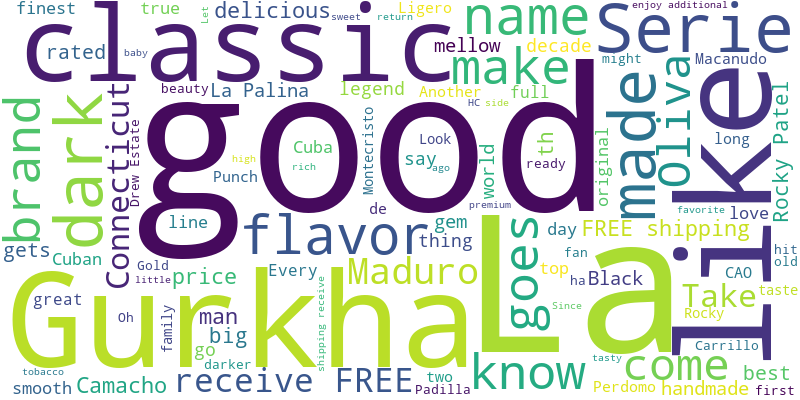

In [191]:

wordcloud = WordCloud(width=800, height=400, stopwords=stopwords_list, background_color="white", max_words=100, 
                      contour_width=3, 
                      contour_color='steelblue')

wordcloud.generate(df_main['desc'].to_string())

wordcloud.to_image()

In [ ]:
stemmer = PorterStemmer()
def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [ ]:

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = df_main['desc']
# data.head()

tf_idf_vectorizor = TfidfVectorizer(stop_words = stopwords,#tokenizer = tokenize_and_stem,
                             max_features = 5000)
%time tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

In [ ]:
initial_centroids = np.random.permutation(tf_idf_array.shape[0])[:3]
initial_centroids
centroids = tf_idf_array[initial_centroids]
centroids.shape
dist_to_centroid =  pairwise_distances(tf_idf_array,centroids, metric = 'euclidean')
cluster_labels = np.argmin(dist_to_centroid, axis = 1)

In [ ]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    
    def convergence_calculation(self):
        """
        Calculates 
        
        """
        pass
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self

In [ ]:
from sklearn.datasets import make_blobs
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)
# create np array for data points
points = data[0]
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

X = data[0]
X[2]

In [ ]:
df_main.info()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from scipy.stats import multivariate_normal as mvn
import nltk
import os
import random




import string
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# email module has some useful functions
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')